/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  if __name__ == '__main__':


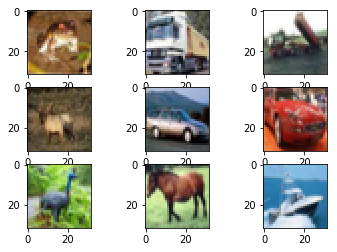

In [10]:
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train[i]))
# show the plot
pyplot.show()

In [0]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [0]:
seed = 7
numpy.random.seed(seed)

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape)

(50000, 32, 32, 3)


In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
__________

In [9]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 280s 6ms/step - loss: 1.7029 - acc: 0.3824 - val_loss: 1.3579 - val_acc: 0.5176
Epoch 2/25
50000/50000 [==============================] - 277s 6ms/step - loss: 1.3229 - acc: 0.5250 - val_loss: 1.2005 - val_acc: 0.5793
Epoch 3/25
50000/50000 [==============================] - 278s 6ms/step - loss: 1.1411 - acc: 0.5951 - val_loss: 1.0505 - val_acc: 0.6229
Epoch 4/25
50000/50000 [==============================] - 277s 6ms/step - loss: 1.0145 - acc: 0.6388 - val_loss: 1.0031 - val_acc: 0.6416
Epoch 5/25
50000/50000 [==============================] - 278s 6ms/step - loss: 0.9106 - acc: 0.6765 - val_loss: 0.9479 - val_acc: 0.6595
Epoch 6/25
50000/50000 [==============================] - 276s 6ms/step - loss: 0.8309 - acc: 0.7065 - val_loss: 0.9245 - val_acc: 0.6753
Epoch 7/25
50000/50000 [==============================] - 276s 6ms/step - 